#### Libraries

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import contextily as cx

#### World-Kenya Map

In [50]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
kenya = world[world['name']=='Kenya']

##### Geo Files

In [96]:
ipc_class = "KE_202209/KE_202209_ML1.shp"
schools = "Schools/Schools.shp"
kenya_ipc = gpd.read_file(ipc_class)
kenya_schools = gpd.read_file(schools)

##### filtered locations

In [58]:
embu=kenya_ipc.loc[kenya_ipc['ADMIN1']=='Embu']
kajiado=kenya_ipc.loc[kenya_ipc['ADMIN1']=='Kajiado']
kitui=kenya_ipc.loc[kenya_ipc['ADMIN1']=='Kitui']
kieni=kenya_ipc.loc[kenya_ipc['ADMIN2']=='Kieni']

##### filtered schools

In [59]:
embu_schools = kenya_schools.loc[(kenya_schools['County']== 'Embu') | (kenya_schools['County']== 'EMBU')]
kajiado_schools = kenya_schools.loc[(kenya_schools['County']=='Kajiado') | (kenya_schools['County']== 'KAJIADO')]
kitui_schools = kenya_schools.loc[(kenya_schools['County']=='Kitui') | (kenya_schools['County']== 'KITUI')]
kieni_schools = kenya_schools.loc[kenya_schools['SUB_COUNTY']=='Kieni']

In [60]:
primary=kenya_schools.loc[kenya_schools['LEVEL']=='Primary']
secondary=kenya_schools.loc[kenya_schools['LEVEL']=='Secondary']

#### read files

In [61]:
embu.head(1)

,cov_start,cov_end,report_mon,country,unit_name,ADMIN0,ADMIN1,ADMIN2,ADMIN3,LZCODE,LZNAME,ML1,HA1,fewsnet_re,geometry
38,09-2022,09-2022,09-2022,KE,"Central Highlands, High Potential Zone, Manyat...",Kenya,Embu,Manyatta,None,KE19,"Central Highlands, High Potential Zone",1,0,East Africa,"POLYGON ((37.59699 -0.51962, 37.59494 -0.52147..."


In [62]:
primary.head(1)

,OBJECTID,CODE,SCHOOL_NAM,LEVEL,Status,County,DISTRICT,ZONE,SUB_COUNTY,Ward,X_Coord,Y_Coord,Source,geometry
0,1,1.0,BAKWANIN,Primary,Public,Baringo,BARINGO CENTRAL,KABASIS,Baringo Central,Sacho,35.79708,0.40955,"Ministry of Education, 2016",POINT (143417.238 10045338.886)


# Visuals

In [98]:
kenya.explore()

##### Colors

In [64]:
colors = {1:'#cdfacd', 2:'#fae61e', 3:'#e67800', 4:'#c80000', 5:'#640000'}
ipc_class_color = kenya_ipc['ML1'].map(colors)
embu_ipc_class_color = embu['ML1'].map(colors)
kajiado_ipc_class_color = kajiado['ML1'].map(colors)
kitui_ipc_class_color = kitui['ML1'].map(colors)
kieni_ipc_class_color = kieni['ML1'].map(colors)

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(33.51131896975005, 42.298495483250264, -5.185307659511332, 5.974385181731248)

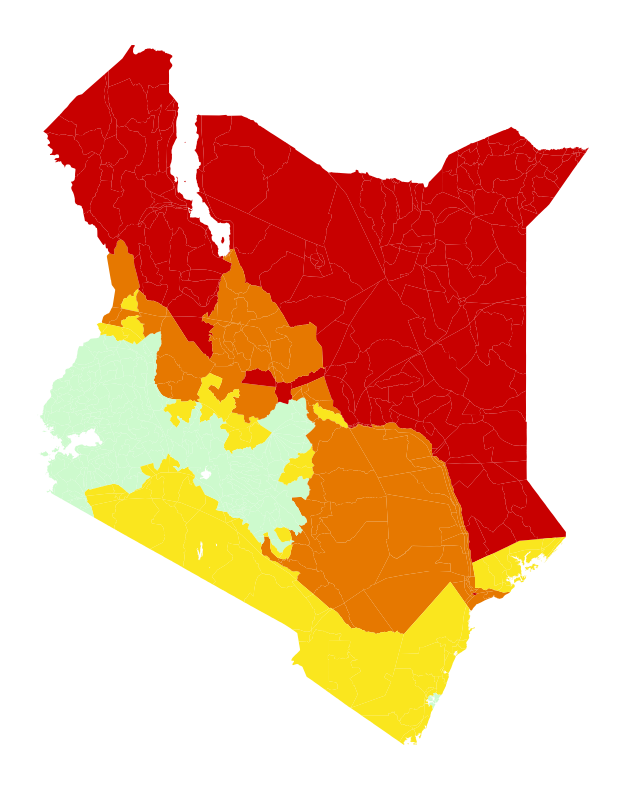

In [94]:
fig,ax = plt.subplots(figsize=(10,10))
kenya_ipc.plot(ax=ax, column='ML1', color=ipc_class_color)
ax.axis('off')

(-109446.4859658754, 864852.2782503669, 9429907.27374865, 10640594.265576525)

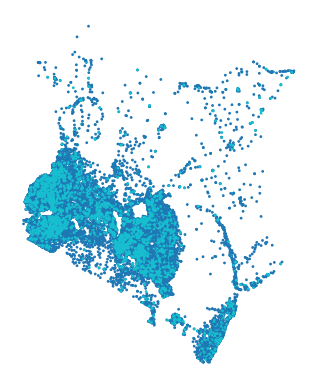

In [91]:
fig,ax = plt.subplots()
kenya_schools.plot(ax=ax, column='LEVEL', markersize=1)
ax.axis('off')


c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-111508.90255077719, 866411.7306106883, 9426788.075572731, 10661682.329161273)

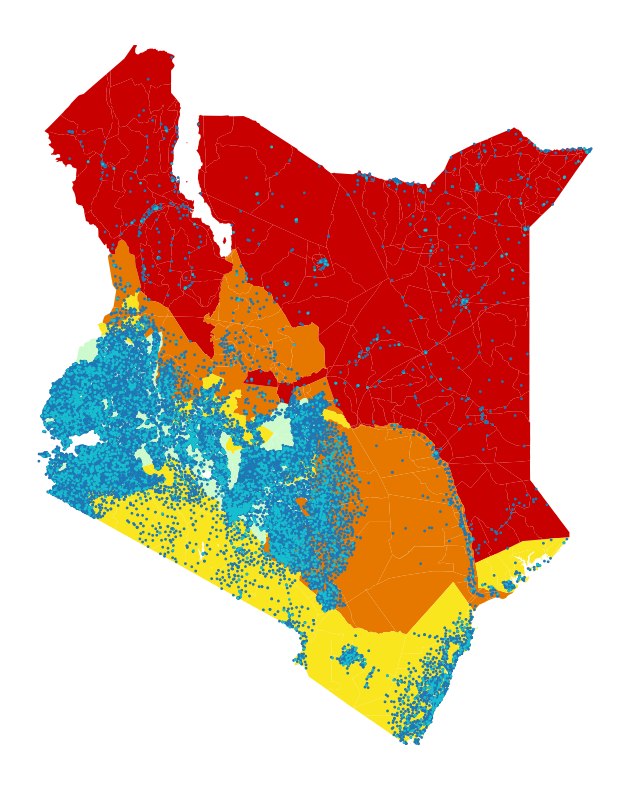

In [93]:
fig,ax = plt.subplots(figsize=(10,10))
kenya_ipc.to_crs(kenya_schools.crs).plot(ax=ax, column='ML1', color=ipc_class_color)
kenya_schools.plot(ax=ax, column='LEVEL', markersize=1)
ax.axis('off')

(-109446.4859658754, 864852.2782503669, 9429907.27374865, 10640594.265576525)

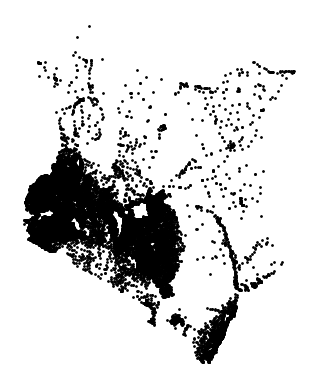

In [71]:
fig,ax = plt.subplots()
primary.plot(ax=ax, color='black', markersize=1)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-111508.90255077719, 866411.7306106883, 9426788.075572731, 10661682.329161273)

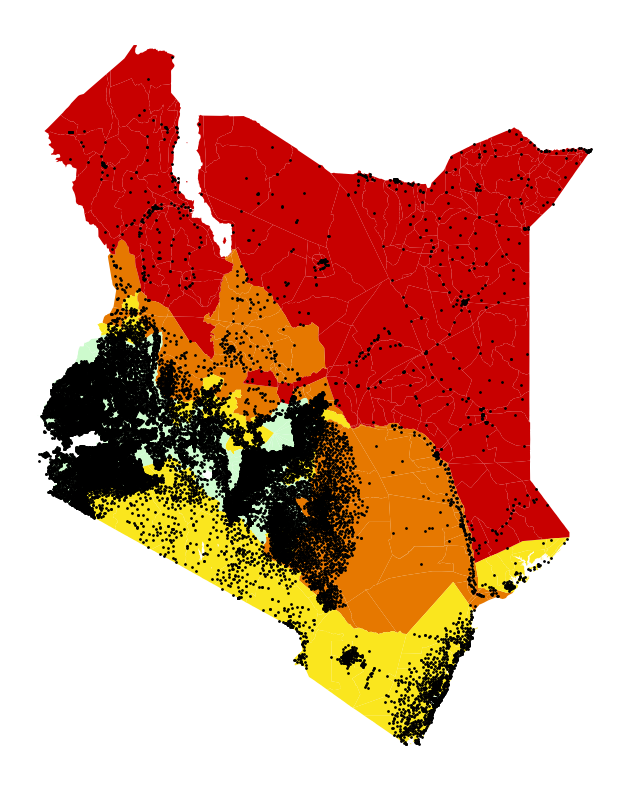

In [72]:
fig,ax = plt.subplots(figsize=(10,10))
kenya_ipc.to_crs(primary.crs).plot(ax=ax, column='ML1', color=ipc_class_color)
primary.plot(ax=ax, color='black', markersize=1)
ax.axis('off')

(-104154.06651005824, 861543.0761807526, 9437226.175299898, 10517427.535884656)

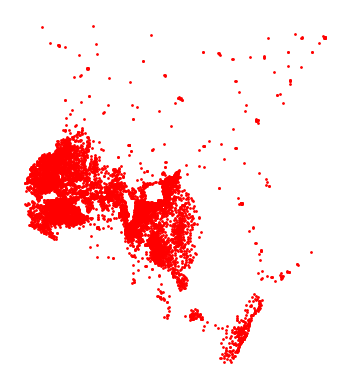

In [73]:
fig,ax = plt.subplots()
secondary.plot(ax=ax, color='red',markersize=1)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-111508.90255077719, 866411.7306106883, 9426788.075572731, 10661682.329161273)

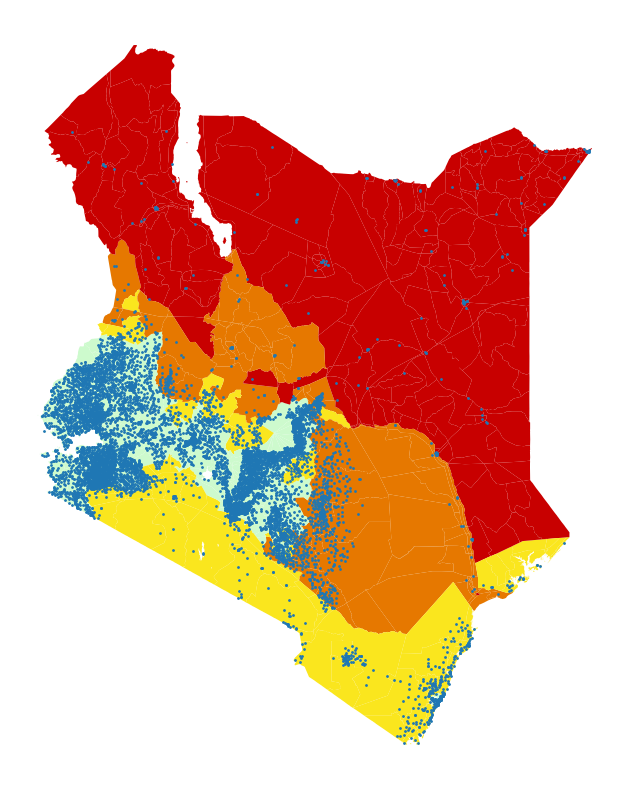

In [74]:
fig,ax = plt.subplots(figsize=(10,10))
kenya_ipc.to_crs(primary.crs).plot(ax=ax, column='ML1', color=ipc_class_color)
secondary.plot(ax=ax, markersize=1)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(37.23447763348776,
 37.969981783362726,
 -0.9564292386778507,
 -0.11384399896351557)

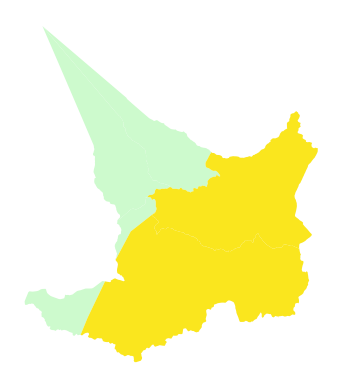

In [75]:
fig,ax = plt.subplots()
embu.plot(ax=ax, column='ML1', color=embu_ipc_class_color)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(303529.3014693788, 385381.65772948397, 9884552.150081461, 9987872.594547695)

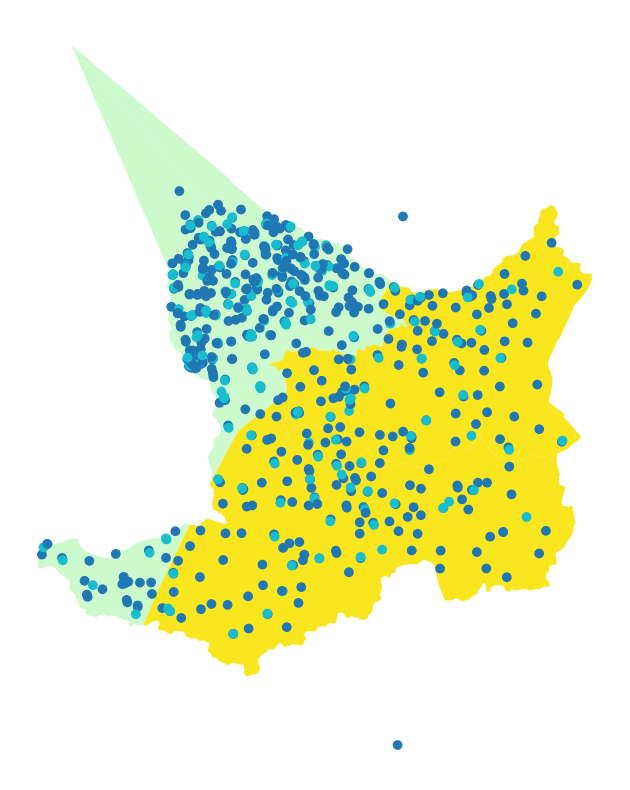

In [76]:
fig,ax = plt.subplots(figsize=(10,10))
embu.to_crs(embu_schools.crs).plot(ax=ax, column='ML1', color=embu_ipc_class_color)
embu_schools.plot(ax=ax, column='LEVEL')
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(35.90355041466517, 38.04213403183513, -3.2967905446574033, -0.934986345892378)

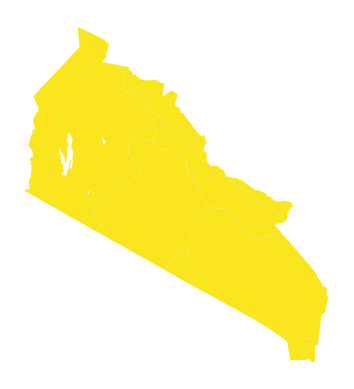

In [77]:
fig,ax = plt.subplots()
kajiado.plot(ax=ax, column='ML1', color=kajiado_ipc_class_color)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(155508.06951032486, 393546.8297663443, 9635531.248800933, 9896527.668691976)

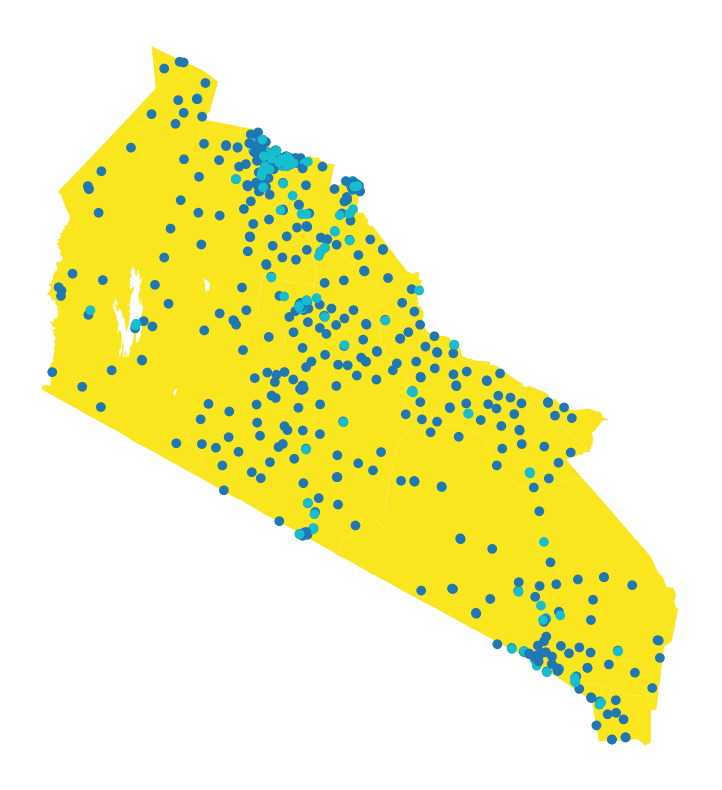

In [78]:
fig,ax = plt.subplots(figsize=(10,10))
kajiado.to_crs(kajiado_schools.crs).plot(ax=ax, column='ML1', color=kajiado_ipc_class_color)
kajiado_schools.plot(ax=ax, column='LEVEL')
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(37.521368341806856, 39.1532847178601, -3.221788739439754, 0.09495621933967335)

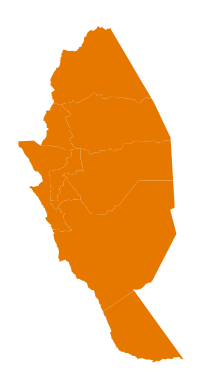

In [79]:
fig,ax = plt.subplots()
kitui.plot(ax=ax, column='ML1', color=kitui_ipc_class_color)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(335478.8417297342, 517043.18030267523, 9643890.097723572, 10010495.303696778)

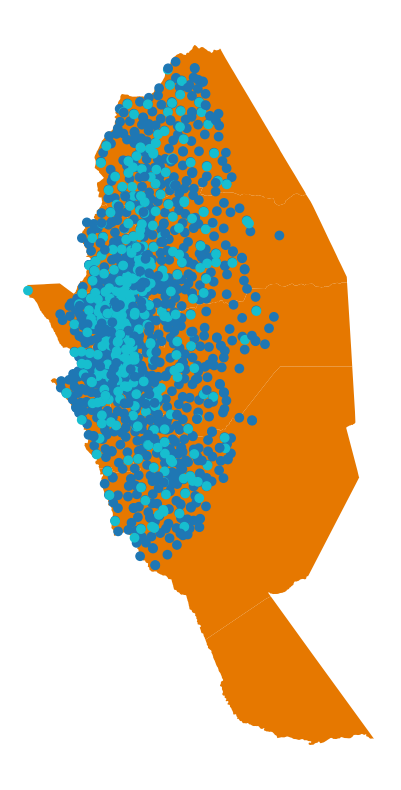

In [80]:
fig,ax = plt.subplots(figsize=(10,10))
kitui.to_crs(kitui_schools.crs).plot(ax=ax, column='ML1', color=kitui_ipc_class_color)
kitui_schools.plot(ax=ax, column='LEVEL')
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(36.56957284896313,
 37.343748873278955,
 -0.48229305835226466,
 0.03356449160207031)

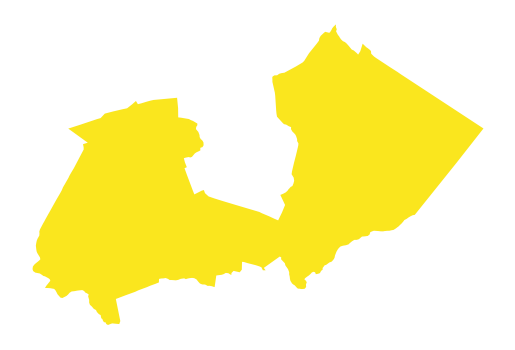

In [81]:
fig,ax = plt.subplots()
kieni.plot(ax=ax, column='ML1', color=kieni_ipc_class_color)
ax.axis('off')

c:\Users\ADMIN\anaconda3\envs\market_dash\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(229479.4057556939, 315676.1354856188, 9934373.113966497, 10004297.168045038)

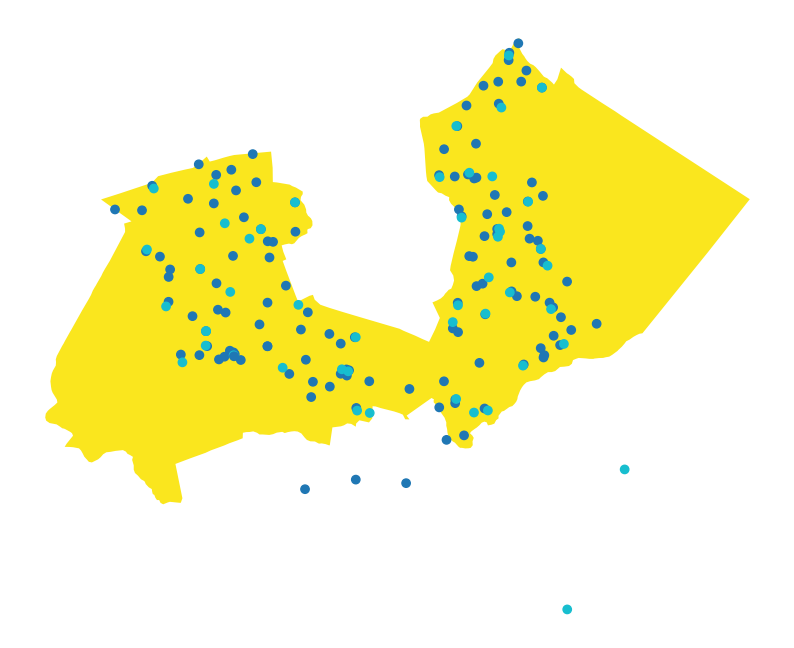

In [82]:
fig,ax = plt.subplots(figsize=(10,10))
kieni.to_crs(kieni_schools.crs).plot(ax=ax, column='ML1', color=kieni_ipc_class_color)
kieni_schools.plot(ax=ax, column='LEVEL')
ax.axis('off')

---